C:\Users\user\AppData\Local\Temp\ipykernel_17316\777934703.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns.drop('label'), rotation=90)


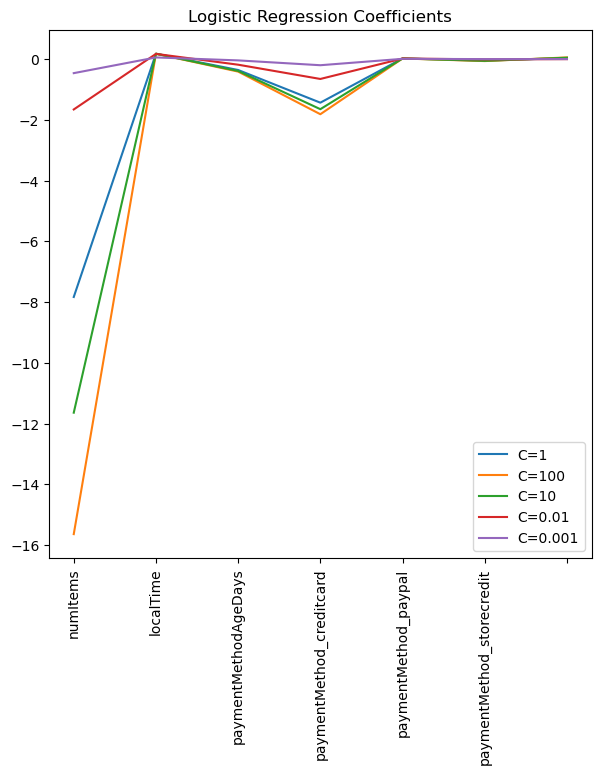

C=1: training set score = 1.000, test set score = 1.000
C=100: training set score = 1.000, test set score = 1.000
C=10: training set score = 1.000, test set score = 1.000
C=0.01: training set score = 1.000, test set score = 1.000
C=0.001: training set score = 0.986, test set score = 0.985
Decision Tree: training set score = 1.000, test set score = 1.000
Decision Tree depth: 1
Feature importances:
accountAgeDays: 1.000
numItems: 0.000
localTime: 0.000
paymentMethodAgeDays: 0.000
paymentMethod_creditcard: 0.000
paymentMethod_paypal: 0.000
paymentMethod_storecredit: 0.000


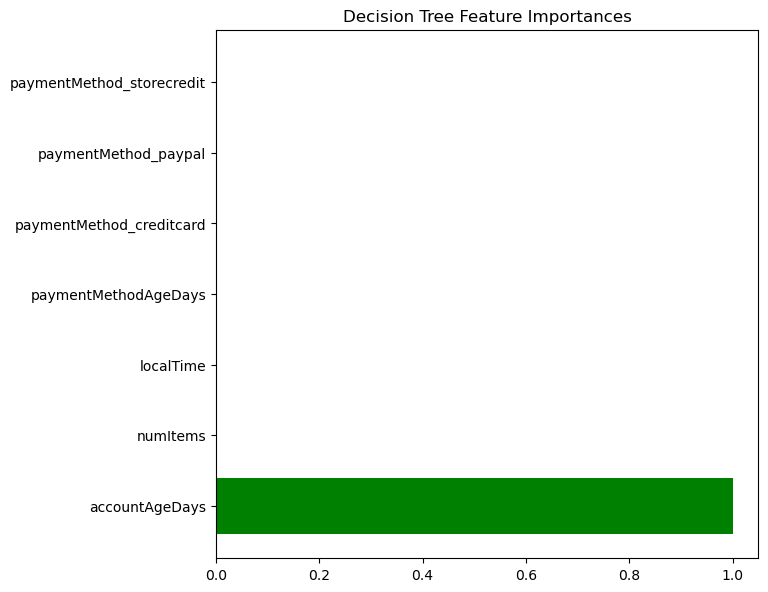

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Load the dataset
df = pd.read_csv("payment_fraud.csv")

# One-hot encode the paymentMethod column
df = pd.get_dummies(df, columns=['paymentMethod'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.33, random_state=42)

# Train logistic regression models with different values of C
C_list = [1, 100, 10, 0.01, 0.001]
logreg_models = []
for C in C_list:
    logreg = LogisticRegression(C=C, random_state=42)
    logreg.fit(X_train, y_train)
    logreg_models.append(logreg)

# Plot the coefficients of the logistic regression models
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
for i, model in enumerate(logreg_models):
    ax.plot(model.coef_.T, label=f'C={C_list[i]}')
ax.set_xticklabels(df.columns.drop('label'), rotation=90)
plt.title('Logistic Regression Coefficients', fontsize=12)
plt.legend()
plt.show()

# Print the training and test set scores of the logistic regression models
for i, model in enumerate(logreg_models):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'C={C_list[i]}: training set score = {train_score:.3f}, test set score = {test_score:.3f}')

# Train a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Print the training and test set scores of the decision tree model
train_score = tree_model.score(X_train, y_train)
test_score = tree_model.score(X_test, y_test)
print(f'Decision Tree: training set score = {train_score:.3f}, test set score = {test_score:.3f}')

# Print the decision tree depth and feature importances
print(f'Decision Tree depth: {tree_model.get_depth()}')
print('Feature importances:')
for feature, importance in zip(df.columns.drop('label'), tree_model.feature_importances_):
    print(f'{feature}: {importance:.3f}')

# Plot the decision tree feature importances
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.barh(df.columns.drop('label'), tree_model.feature_importances_, color='green')
plt.title('Decision Tree Feature Importances', fontsize=12)
plt.show()
